# Civil Engineering Machine Learning Project


***
## 1. Data Extraction

In [81]:
"""
Created on Tue Jul 18 03:12:39 2017

@author: Aamir
"""
%matplotlib inline

### Import Libraries

In [82]:

import os
import scipy.io
import numpy as np
import pandas as pd
from math import log10, floor
from datetime import datetime

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import xgboost as xgb

from IPython.display import SVG
import matplotlib.pyplot as plt

In [83]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Import and select relevant data 

In [84]:
temp1 = pd.read_excel("Type 1.xlsx", sheetname="B1")
temp2 = pd.read_excel("Type 1.xlsx", sheetname="B2")
temp3 = pd.read_excel("Type 1.xlsx", sheetname="B3")

In [85]:
temp1.shape, temp2.shape, temp3.shape

((258735, 37), (138661, 42), (162644, 20))

In [86]:
temp1

,ID,DDD,HH:MM:SS.mmmuuun,PARA1,CH,RISE,COUN,ENER,DURATION,AMP,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID,DDD,HH:MM:SS.mmmuuun,PARA1,CH,RISE,COUN,ENER,DURATION,AMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,173,0,00:01:13.212000,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,00:01:13.212000,0.0143,2,21,4,2,134,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,173,0,00:01:13.505000,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,00:01:13.505000,0.0131,4,9,5,2,114,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ID,DDD,HH:MM:SS.mmmuuun,PARA1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,0,00:01:14,0.0143,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
train = temp1.iloc[:,0:20]
test = temp2.iloc[:,0:21]

In [185]:
train = train[train.ID!='ID']
train.dropna(inplace=True)
test = test[test.ID!='ID']
test.dropna(inplace=True)

In [186]:
train.columns

Index(['ID', 'DDD', 'HH:MM:SS.mmmuuun', 'PARA1', 'CH', 'RISE', 'COUN', 'ENER',
       'DURATION', 'AMP', 'A-FRQ', 'RMS', 'ASL', 'PCNTS', 'THR', 'R-FRQ',
       'I-FRQ', 'SIG-STRNGTH', 'ABS-ENERGY', 'DAMAGE'],
      dtype='object')

In [187]:
test.head()

,ID,DDD,HH:MM:SS.mmmuuun,PARA1,CH,RISE,COUN,ENER,DURATION,AMP,...,RMS,ASL,PCNTS,THR,R-FRQ,I-FRQ,SIG,STRNGTH,ABS-ENERGY,DAMAGE
9,1,0,00:00:57.727000,0.0122,3,1,5,2,142,50,...,0.0002,13,1,45,28,1000,15,113,230.56,1.0
18,1,0,00:01:00.885000,0.0122,3,14,17,20,471,67,...,0.0002,13,2,45,32,142,129,393,7176,1.0
36,1,0,00:01:12.285000,0.0119,3,50,35,41,1400,64,...,0.0002,13,3,45,23,60,262,227,11707,1.0
38,1,0,00:01:12.285000,0.0073,2,1,18,18,666,89,...,0.0002,13,1,45,25,1000,118,334,4150,1.0
40,1,0,00:01:12.285000,0.0122,4,2,1,0,4,46,...,0.0002,12,1,45,0,500,771,0.65,16.68,1.0


In [188]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

### Check data frame structure 

In [189]:
train.shape, test.shape

((127718, 20), (68534, 21))

In [190]:
train.dtypes, test.dtypes

(ID                   object
 DDD                  object
 HH:MM:SS.mmmuuun     object
 PARA1                object
 CH                   object
 RISE                 object
 COUN                 object
 ENER                 object
 DURATION             object
 AMP                  object
 A-FRQ                object
 RMS                  object
 ASL                  object
 PCNTS                object
 THR                  object
 R-FRQ                object
 I-FRQ                object
 SIG-STRNGTH          object
 ABS-ENERGY           object
 DAMAGE              float64
 dtype: object, ID                   object
 DDD                  object
 HH:MM:SS.mmmuuun     object
 PARA1                object
 CH                   object
 RISE                 object
 COUN                 object
 ENER                 object
 DURATION             object
 AMP                  object
 A-FRQ                object
 RMS                  object
 ASL                  object
 PCNTS                object

In [191]:
train.head(), test.head()

(  ID DDD HH:MM:SS.mmmuuun   PARA1 CH RISE COUN ENER DURATION AMP A-FRQ  \
 0  1   0  00:01:13.212000  0.0143  2   21    4    2      134  51    30   
 1  1   0  00:01:13.505000  0.0131  4    9    5    2      114  52    44   
 2  1   0  00:01:14.793000  0.0131  2    1    1    0        2  47   500   
 3  1   0  00:01:14.918000  0.0119  2    1    2    0       55  45    36   
 4  1   0  00:01:15.187000  0.0092  2   27   12    8      442  57    27   
 
       RMS ASL PCNTS THR R-FRQ I-FRQ SIG-STRNGTH ABS-ENERGY  DAMAGE  
 0  0.0002  13     2  45    17    95       13088    202.701     1.0  
 1  0.0002  13     1  45    38   111       14372    260.846     1.0  
 2  0.0002  14     1  45     0  1000      283.65      6.438     1.0  
 3  0.0002  14     1  45    18  1000        4188     52.109     1.0  
 4  0.0004  16     2  45    24    74       51280       1296     1.0  ,
   ID DDD HH:MM:SS.mmmuuun   PARA1 CH RISE COUN ENER DURATION AMP  ...    \
 0  1   0  00:00:57.727000  0.0122  3    1    5    

***
## 2. Data Cleaning
### Check and fill missing values 

In [192]:
#train.count(), test.count()

No missing data. Incomplete entries have already been removed.

### Convert to numeric columns 

In [193]:
train['ID'] = train['ID'].astype(int)
train['DDD'] = train['DDD'].astype(int)
train['PARA1'] = train['PARA1'].astype(float)
train['CH'] = train['CH'].astype(int)
train['RISE'] = train['RISE'].astype(int)
train['COUN'] = train['COUN'].astype(int)
train['ENER'] = train['ENER'].astype(int)
train['DURATION'] = train['DURATION'].astype(int)
train['AMP'] = train['AMP'].astype(int)
train['A-FRQ'] = train['A-FRQ'].astype(int)
train['RMS'] = train['RMS'].astype(float)
train['ASL'] = train['ASL'].astype(int)
train['PCNTS'] = train['PCNTS'].astype(int)
train['THR'] = train['THR'].astype(int)
train['R-FRQ'] = train['R-FRQ'].astype(int)
train['I-FRQ'] = train['I-FRQ'].astype(int)
train['SIG-STRNGTH'] = train['SIG-STRNGTH'].astype(float)
train['ABS-ENERGY'] = train['ABS-ENERGY'].astype(float)
train['DAMAGE'] = train['DAMAGE'].astype(int)

train.dtypes

ID                    int32
DDD                   int32
HH:MM:SS.mmmuuun     object
PARA1               float64
CH                    int32
RISE                  int32
COUN                  int32
ENER                  int32
DURATION              int32
AMP                   int32
A-FRQ                 int32
RMS                 float64
ASL                   int32
PCNTS                 int32
THR                   int32
R-FRQ                 int32
I-FRQ                 int32
SIG-STRNGTH         float64
ABS-ENERGY          float64
DAMAGE                int32
dtype: object

In [194]:
test['ID'] = test['ID'].astype(int)
test['DDD'] = test['DDD'].astype(int)
test['PARA1'] = test['PARA1'].astype(float)
test['CH'] = test['CH'].astype(int)
test['RISE'] = test['RISE'].astype(int)
test['COUN'] = test['COUN'].astype(int)
test['ENER'] = test['ENER'].astype(int)
test['DURATION'] = test['DURATION'].astype(int)
test['AMP'] = test['AMP'].astype(int)
test['A-FRQ'] = test['A-FRQ'].astype(int)
test['RMS'] = test['RMS'].astype(float)
test['ASL'] = test['ASL'].astype(int)
test['PCNTS'] = test['PCNTS'].astype(int)
test['THR'] = test['THR'].astype(int)
test['R-FRQ'] = test['R-FRQ'].astype(int)
test['I-FRQ'] = test['I-FRQ'].astype(int)
test['SIG'] = test['SIG'].astype(int)
test['STRNGTH'] = test['STRNGTH'].astype(float)
test['ABS-ENERGY'] = test['ABS-ENERGY'].astype(float)
test['DAMAGE'] = test['DAMAGE'].astype(int)

In [195]:
test['SIG-STRNGTH'] = test['SIG'] * 10 + test['STRNGTH'] // np.ceil(10**np.floor(np.log10(test['STRNGTH']+0.1)))
test.drop('SIG',axis=1,inplace=True)
test.drop('STRNGTH',axis=1,inplace=True)
test.dtypes

ID                    int32
DDD                   int32
HH:MM:SS.mmmuuun     object
PARA1               float64
CH                    int32
RISE                  int32
COUN                  int32
ENER                  int32
DURATION              int32
AMP                   int32
A-FRQ                 int32
RMS                 float64
ASL                   int32
PCNTS                 int32
THR                   int32
R-FRQ                 int32
I-FRQ                 int32
ABS-ENERGY          float64
DAMAGE                int32
SIG-STRNGTH         float64
dtype: object

In [196]:
train.to_excel("trainData.xlsx")
test.to_excel("testData.xlsx")

### Normalize Data

In [197]:
# mn = pd.DataFrame.mean(data)
# vr = pd.DataFrame.var(data)

# data.RISE = (data.RISE - mn.RISE) / vr.RISE
# data.COUN = (data.COUN - mn.COUN) / vr.COUN
# data.ENER = (data.ENER - mn.ENER) / vr.ENER
# data.DURATION = (data.DURATION - mn.DURATION) / vr.DURATION
# data.AMP = (data.AMP - mn.AMP) / vr.AMP
# data.A_FRQ = (data.A_FRQ - mn.A_FRQ) / vr.A_FRQ
# data.SIG_STRNGTH = (data.SIG_STRNGTH - mn.SIG_STRNGTH) / vr.SIG_STRNGTH
# data.ABS_ENERGY = (data.ABS_ENERGY - mn.ABS_ENERGY) / vr.ABS_ENERGY

In [198]:
train['HR'] = train['HH:MM:SS.mmmuuun'].apply(lambda x: x.hour)
train['MIN'] = train['HH:MM:SS.mmmuuun'].apply(lambda x: x.minute)
train['SEC'] = train['HH:MM:SS.mmmuuun'].apply(lambda x: x.second)
train['USEC'] = train['HH:MM:SS.mmmuuun'].apply(lambda x: x.microsecond)

In [199]:
test['HR'] = test['HH:MM:SS.mmmuuun'].apply(lambda x: x.hour)
test['MIN'] = test['HH:MM:SS.mmmuuun'].apply(lambda x: x.minute)
test['SEC'] = test['HH:MM:SS.mmmuuun'].apply(lambda x: x.second)
test['USEC'] = test['HH:MM:SS.mmmuuun'].apply(lambda x: x.microsecond)

In [200]:
train.head()

,ID,DDD,HH:MM:SS.mmmuuun,PARA1,CH,RISE,COUN,ENER,DURATION,AMP,...,THR,R-FRQ,I-FRQ,SIG-STRNGTH,ABS-ENERGY,DAMAGE,HR,MIN,SEC,USEC
0,1,0,00:01:13.212000,0.0143,2,21,4,2,134,51,...,45,17,95,13088.00,202.701,1,0,1,13,212000
1,1,0,00:01:13.505000,0.0131,4,9,5,2,114,52,...,45,38,111,14372.00,260.846,1,0,1,13,505000
2,1,0,00:01:14.793000,0.0131,2,1,1,0,2,47,...,45,0,1000,283.65,6.438,1,0,1,14,793000
3,1,0,00:01:14.918000,0.0119,2,1,2,0,55,45,...,45,18,1000,4188.00,52.109,1,0,1,14,918000
4,1,0,00:01:15.187000,0.0092,2,27,12,8,442,57,...,45,24,74,51280.00,1296.000,1,0,1,15,187000


In [201]:
test.head()

,ID,DDD,HH:MM:SS.mmmuuun,PARA1,CH,RISE,COUN,ENER,DURATION,AMP,...,THR,R-FRQ,I-FRQ,ABS-ENERGY,DAMAGE,SIG-STRNGTH,HR,MIN,SEC,USEC
0,1,0,00:00:57.727000,0.0122,3,1,5,2,142,50,...,45,28,1000,230.56,1,151.0,0,0,57,727000
1,1,0,00:01:00.885000,0.0122,3,14,17,20,471,67,...,45,32,142,7176.00,1,1293.0,0,1,0,885000
2,1,0,00:01:12.285000,0.0119,3,50,35,41,1400,64,...,45,23,60,11707.00,1,2622.0,0,1,12,285000
3,1,0,00:01:12.285000,0.0073,2,1,18,18,666,89,...,45,25,1000,4150.00,1,1183.0,0,1,12,285000
4,1,0,00:01:12.285000,0.0122,4,2,1,0,4,46,...,45,0,500,16.68,1,7710.0,0,1,12,285000


In [232]:
X = train.copy()
y = train['DAMAGE'].copy()
Z_X = test.copy()
Z_y = test['DAMAGE'].copy()

In [233]:
X.drop('HH:MM:SS.mmmuuun',axis=1,inplace=True)
X.drop('DAMAGE',axis=1,inplace=True)

In [234]:
Z_X.drop('HH:MM:SS.mmmuuun',axis=1,inplace=True)
Z_X.drop('DAMAGE',axis=1,inplace=True)

In [235]:
X.columns

Index(['ID', 'DDD', 'PARA1', 'CH', 'RISE', 'COUN', 'ENER', 'DURATION', 'AMP',
       'A-FRQ', 'RMS', 'ASL', 'PCNTS', 'THR', 'R-FRQ', 'I-FRQ', 'SIG-STRNGTH',
       'ABS-ENERGY', 'HR', 'MIN', 'SEC', 'USEC'],
      dtype='object')

In [236]:
Z_X = Z_X[X.columns]

In [237]:
Z_X.columns

Index(['ID', 'DDD', 'PARA1', 'CH', 'RISE', 'COUN', 'ENER', 'DURATION', 'AMP',
       'A-FRQ', 'RMS', 'ASL', 'PCNTS', 'THR', 'R-FRQ', 'I-FRQ', 'SIG-STRNGTH',
       'ABS-ENERGY', 'HR', 'MIN', 'SEC', 'USEC'],
      dtype='object')

Split Train/Test Sets

In [238]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [239]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((102174, 22), (25544, 22), (102174,), (25544,))

***
## 3. Train and Evaluate the Model

### XGBoost MODEL

### XGBoost Setup

In [240]:
# Specify the model
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(Z_X)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

### XGBoost training and evaluation

In [241]:
xgb_pars = {'min_child_weight': 50, 'eta': 0.1, 'colsample_bytree': 0.9, 'max_depth': 10,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}

model1 = xgb.train(xgb_pars, dtrain, 1000, watchlist, early_stopping_rounds=10,
      maximize=False, verbose_eval=1)

print('Modeling RMSLE %.5f' % model.best_score)

[0]	train-rmse:2.63927	valid-rmse:2.63198
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:2.37537	valid-rmse:2.36882
[2]	train-rmse:2.13787	valid-rmse:2.13197
[3]	train-rmse:1.92411	valid-rmse:1.91881
[4]	train-rmse:1.73174	valid-rmse:1.72696
[5]	train-rmse:1.5586	valid-rmse:1.55431
[6]	train-rmse:1.40278	valid-rmse:1.39892
[7]	train-rmse:1.26254	valid-rmse:1.25908
[8]	train-rmse:1.13634	valid-rmse:1.13323
[9]	train-rmse:1.02275	valid-rmse:1.01997
[10]	train-rmse:0.920528	valid-rmse:0.918045
[11]	train-rmse:0.828535	valid-rmse:0.82631
[12]	train-rmse:0.745739	valid-rmse:0.743755
[13]	train-rmse:0.671231	valid-rmse:0.669462
[14]	train-rmse:0.604177	valid-rmse:0.602606
[15]	train-rmse:0.543833	valid-rmse:0.542436
[16]	train-rmse:0.489533	valid-rmse:0.488295
[17]	train-rmse:0.440663	valid-rmse:0.439574
[18]	train-rmse:0.396689	valid-rmse:0.39574
[19]	train-rmse:0.35712	valid-rms

[179]	train-rmse:0.007069	valid-rmse:0.009407
[180]	train-rmse:0.007035	valid-rmse:0.009379
[181]	train-rmse:0.007029	valid-rmse:0.009372
[182]	train-rmse:0.007024	valid-rmse:0.009376
[183]	train-rmse:0.007007	valid-rmse:0.009377
[184]	train-rmse:0.006998	valid-rmse:0.009376
[185]	train-rmse:0.006976	valid-rmse:0.009351
[186]	train-rmse:0.006955	valid-rmse:0.00933
[187]	train-rmse:0.006947	valid-rmse:0.009323
[188]	train-rmse:0.006937	valid-rmse:0.009317
[189]	train-rmse:0.006928	valid-rmse:0.00932
[190]	train-rmse:0.006896	valid-rmse:0.009273
[191]	train-rmse:0.006877	valid-rmse:0.009256
[192]	train-rmse:0.006871	valid-rmse:0.009264
[193]	train-rmse:0.006868	valid-rmse:0.009263
[194]	train-rmse:0.006858	valid-rmse:0.009248
[195]	train-rmse:0.006848	valid-rmse:0.009233
[196]	train-rmse:0.006834	valid-rmse:0.009219
[197]	train-rmse:0.006824	valid-rmse:0.009215
[198]	train-rmse:0.006806	valid-rmse:0.009194
[199]	train-rmse:0.006799	valid-rmse:0.009183
[200]	train-rmse:0.006792	valid-rmse

[358]	train-rmse:0.005228	valid-rmse:0.008026
[359]	train-rmse:0.005225	valid-rmse:0.008024
[360]	train-rmse:0.005221	valid-rmse:0.008026
[361]	train-rmse:0.005218	valid-rmse:0.008025
[362]	train-rmse:0.005199	valid-rmse:0.00801
[363]	train-rmse:0.005191	valid-rmse:0.008007
[364]	train-rmse:0.005184	valid-rmse:0.007998
[365]	train-rmse:0.00518	valid-rmse:0.007999
[366]	train-rmse:0.005163	valid-rmse:0.007986
[367]	train-rmse:0.005159	valid-rmse:0.007983
[368]	train-rmse:0.005156	valid-rmse:0.007982
[369]	train-rmse:0.005153	valid-rmse:0.007978
[370]	train-rmse:0.005149	valid-rmse:0.007978
[371]	train-rmse:0.005146	valid-rmse:0.007971
[372]	train-rmse:0.00514	valid-rmse:0.00797
[373]	train-rmse:0.005128	valid-rmse:0.007964
[374]	train-rmse:0.005125	valid-rmse:0.007965
[375]	train-rmse:0.005124	valid-rmse:0.007965
[376]	train-rmse:0.005102	valid-rmse:0.007937
[377]	train-rmse:0.005098	valid-rmse:0.007935
[378]	train-rmse:0.005096	valid-rmse:0.007937
[379]	train-rmse:0.005088	valid-rmse:0

### Train/Validation Set Evaluation 

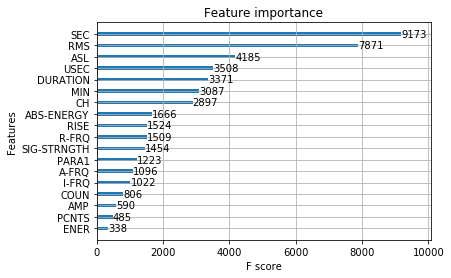

In [242]:
xgb.plot_importance(model1, height=0.3)

### Prediction

In [243]:
# evaluate the model
pred = model1.predict(dtest)

In [ ]:
pred = np.exp(pred) - 1

In [251]:
len(pred), len(Z_y)

(68534, 68534)

In [252]:
pred

array([  5.17074299,   3.13505983,   2.94549942, ...,  53.54247665,
        54.07151794,  53.72103882], dtype=float32)

In [265]:
# fit model no training data
model2 = xgb.XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [262]:
# make predictions for test data
Z_h = model2.predict(Z_X)
Z_h

array([1, 1, 1, ..., 4, 4, 4])

In [256]:
predictions = [round(value) for value in Z_pred]

In [263]:
np.mean(Z_h == Z_y)

0.59357399247089038

In [473]:
result["DAMAGE"] = predictions

In [474]:
result.to_excel("resultTest.xlsx")

In [264]:
# evaluate predictions
accuracy = accuracy_score(Z_y, Z_h)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.36%


### RandomTreeClassifier MODEL

### Check feature importance

In [266]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X,y)

In [267]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

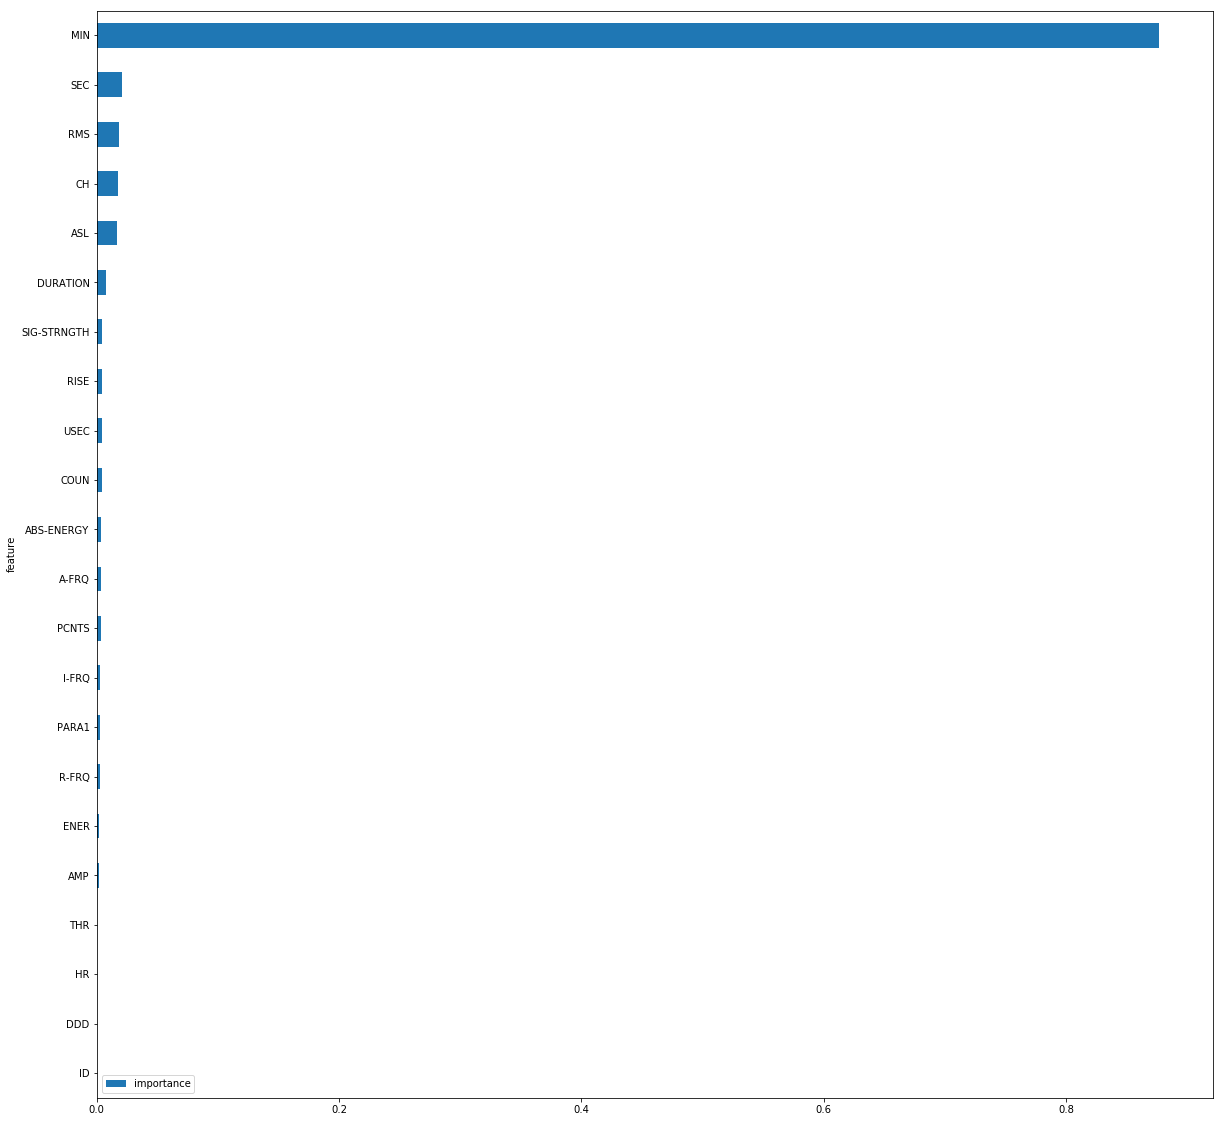

In [268]:
features.plot(kind='barh', figsize=(20, 20))

### Hyperparameter tuning

In [273]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50,
                'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
model3 = RandomForestClassifier(**parameters)
model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
xval = cross_val_score(model, X_valid, y_valid, cv = 5, scoring='accuracy')
np.mean(xval)

1.0

In [275]:
Z_h = model3.predict(Z_X)

In [277]:
np.mean(Z_h == Z_y)

0.57466367058686196

In [280]:
pd.DataFrame(Z_h, Z_y)

,0
DAMAGE,
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3
1,3


***
## 5. Predict the Test set

### Select test model features 

### Make predictions 

***
## 6. Save Results
### Create the Solution 

In [ ]:
my_solution.index.name

### Save to CSV file 

In [ ]:
my_solution.to_csv("my_solution_six.csv")

***
***
# Rough Work 

In [ ]:
%matplotlib inline